In [13]:
import pandas as pd
import re
import string

In [14]:
data = pd.read_csv("dataset/hate_speech.tsv", sep='\t',header=None)

In [15]:
data.columns = ["text", "label"]

In [16]:
data.dropna(inplace=True)

In [17]:
data.reset_index(inplace=True)

In [18]:
data.head()

,index,text,label
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes


In [19]:
def clean(text):
#     text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower()
    text = text.strip()
    text = text.translate(str.maketrans('','','1234567890'))
    
    return text

In [20]:
data["text"] = data["text"].apply(clean)

In [21]:
pd.get_dummies(data, prefix=['label'], columns=['label'])

,index,text,label_no,label_yes
0,0,knowing ki vikas kitna samjhata hai priyanka a...,1,0
1,1,i am muhajir aur mere lye sab se pehly pakist...,1,0
2,2,doctor sab sahi me ke phd in hate politics wa...,1,0
3,3,poore desh me patel obc me aate hain sirf gujr...,1,0
4,4,sarkar banne ke bad hindu hit me ek bhi faisla...,0,1
5,5,hate it jab test ata ho phr bh acha na ho,0,1
6,6,ek dil ek jaan akal ke imitihaan kal kp ke rap...,1,0
7,7,aise logo se sakht nafrat karta hu jo caste ko...,0,1
8,8,sir jyada sentimental mat ho jao peene ke baad...,0,1
9,9,i am very sorry to say saaf dil shilpa ke fans...,1,0


In [9]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop = list(stop)
from string import punctuation
from functools import reduce
import itertools


from collections import Counter
import re
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

%matplotlib inline

In [10]:
data["label"].count()

4578

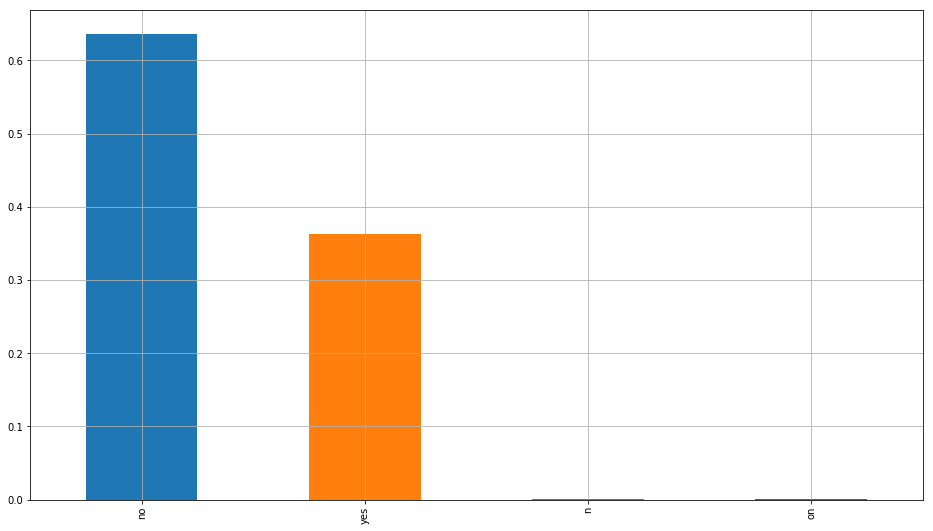

In [11]:
data.label.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(16, 9))

In [12]:
def load_data_and_labels():
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files
    examples = data['text']
    examples = list(examples)
    examples = [s.strip() for s in examples]
    
    # Split by words
    x_text = examples
    #x_text = [clean_str(sent) for sent in x_text]
    #x_text = [removeNonAscii(sent) for sent in x_text]
    x_text = [s.split(" ") for s in x_text]
    
    # Generate labels
    y = list(data['label'].map(lambda x : 1 if x=='yes' else 0))
    
#     print("load data and labels:", [len(x_text),len(y)])
    return [x_text, y]

In [13]:
def build_vocab(sentences):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts = Counter(itertools.chain(*sentences))
    # Mapping from index to word
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    # Mapping from word to index
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    
#     print("Vocabulary: ", len(vocabulary), len(vocabulary_inv))
    return [vocabulary, vocabulary_inv]

In [14]:
def build_input_data(sentences, labels, vocabulary):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    x = np.array([[vocabulary[word] for word in sentence] for sentence in sentences])
    y = np.array(labels)
    
#     print("Build input data:", [len(x),len(y)])
    return [x, y]


In [15]:
def pad_sentences(sentences, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    sequence_length = max(len(x) for x in sentences)
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        new_sentence = sentence + [padding_word] * num_padding
        padded_sentences.append(new_sentence)
        
   #  print("Padded sentences: ", len(padded_sentences))
    return padded_sentences

In [150]:
def load_data():
    x, y, vocabulary, vocabulary_inv_list = preprocess_data()
    vocabulary_inv = {key: value for key, value in enumerate(vocabulary_inv_list)}
    
    # Shuffle data
    shuffle_indices = np.random.permutation(np.arange(len(y)))
    x = x[shuffle_indices]
    y = y[shuffle_indices]
    train_len = int(len(x) * 0.9)
    x_train = x[:train_len]
    y_train = y[:train_len]
    x_test = x[train_len:]
    y_test = y[train_len:]

    return x_train, y_train, x_test, y_test, vocabulary, vocabulary_inv

In [151]:
# Data Preparation
print("Load data...")
x_train, y_train, x_test, y_test, vocabulary, vocabulary_inv = load_data()

# if sequence_length != x_test.shape[1]:
#     print("Adjusting sequence length for actual size")
#     sequence_length = x_test.shape[1]

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Vocabulary Size: {:d}".format(len(vocabulary_inv)))

Load data...
x_train shape: (4120, 67)
x_test shape: (458, 67)
Vocabulary Size: 15292


In [17]:
temp = preprocess_data()

In [168]:
sequence_length = 67
n_words = 15292
n_tags = 2

In [169]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [170]:
input = Input(shape=(sequence_length,))

model = Embedding(input_dim=n_words, output_dim=50, input_length=sequence_length)(input)
model = Dropout(0.5)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, dropout=0.5, recurrent_dropout=0.25))(model)
model = Dropout(0.5)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, dropout=0.5, recurrent_dropout=0.25))(model)
model = Dropout(0.5)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, dropout=0.5, recurrent_dropout=0.25))(model)

out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

In [171]:
model = Model(input, out)

In [172]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [174]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.3, verbose=1)

ValueError: Error when checking target: expected time_distributed_1 to have 3 dimensions, but got array with shape (4120, 1)

In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()